# CS294-082 Midterm Assignment

In [ ]:
import numpy as np
import torch
import pandas
import matplotlib.pyplot as plt

## Chapter 6: The Mechanics of Generalization

### 1. Logic Definition of Generalization:
* (a) Show empirically that the information limit of 2 prediction bits per parameter also holds for nearest neighbors.
* (b) Extend your experiments to multi-class classification.

#### (a) As shown in the figure generated below, when the number of parameters increases

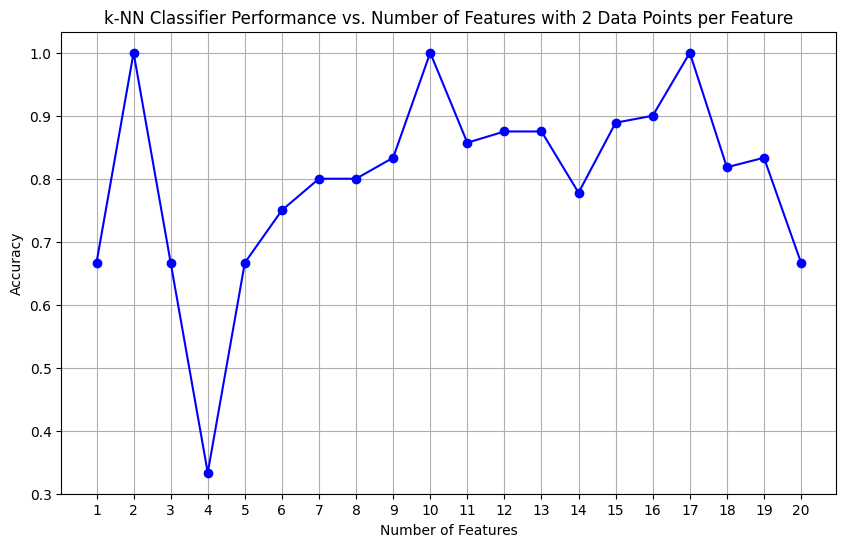

In [ ]:
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(ratios, p_memorization, color='blue')
plt.xlabel('Samples/Features Ratio (n/n_features)')
plt.ylabel('Probability of Memorization')
# plt.title('Prediction Bits per Parameter vs. Samples/Features Ratio')
plt.xscale('log')
plt.grid(True)
plt.show()

### 2. Finite State Machine Generalization:
* (a) Implement a program that automatically creates a set of if-then clauses from the training table of a binary dataset of your choice. Implement different strategies to minimize the number of if-then clauses. Document your strategies, the number of resulting conditional clauses, and the accuracy achieved.
* (b) Use the algorithms developed in (a) on different datasets. Again, observe how your choices make a difference.
* (c) Finally, use the programs developed in (a) on a completely random dataset, generated artificially. Vary your strategies but also the number of input columns as well as the number of instances. How many if-then clauses do you need?

#### (a) Implement a program that automatically creates a set of if-then clauses from the training table of a binary dataset of your choice. Implement different strategies to minimize the number of if-then clauses. Document your strategies, the number of resulting conditional clauses, and the accuracy achieved.
Ans: In this experiment, I used decision-trees on sklearn breast cancer dataset. The default decision achieved an accuracy 0.947 with 15 if-then clauses. To minimize the number of if-then clauses, I tried two strategies. The first is to limit the depth of the tree. By limiting the depth to 2, the resultant tree achieved an accuracy if 0.930 with 3 if-else clauses. The second approach is to set a minimum number of samples required to creat a if-then clause. The resultant tree achieved an accuracy of 0.956 with 10 if-else clauses. These results show that more if-then clauses may not necessarily lead to better accuracy in test set, i.e., better generalization.

In [ ]:
from sklearn import tree
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

def count_if_then_clauses(dt):
    return len([x for x in dt.tree_.feature if x != tree._tree.TREE_UNDEFINED])

# Load the dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, data.target_names)

(455, 30) ['malignant' 'benign']


Accuracy 0.9473684210526315 with 15 if-else clauses


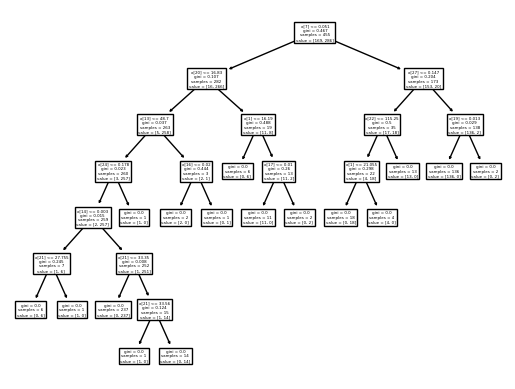

In [ ]:
# Basic Decision Tree Model
dt_basic = DecisionTreeClassifier(random_state=42)
dt_basic.fit(X_train, y_train)
predictions_basic = dt_basic.predict(X_test)
accuracy_basic = accuracy_score(y_test, predictions_basic)
_ = tree.plot_tree(dt_basic)
print(f"Accuracy {accuracy_basic} with {count_if_then_clauses(dt_basic)} if-else clauses")

Accuracy 0.9298245614035088 with 3 if-else clauses


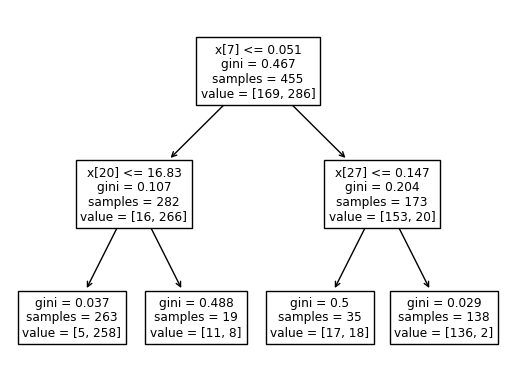

In [ ]:
# Decision Tree with Limited Depth
dt_limited_depth = DecisionTreeClassifier(max_depth=2, random_state=42)
dt_limited_depth.fit(X_train, y_train)
predictions_limited_depth = dt_limited_depth.predict(X_test)
accuracy_limited_depth = accuracy_score(y_test, predictions_limited_depth)
_ = tree.plot_tree(dt_limited_depth)
print(f"Accuracy {accuracy_limited_depth} with {count_if_then_clauses(dt_limited_depth)} if-else clauses")

Accuracy 0.956140350877193 with 10 if-else clauses


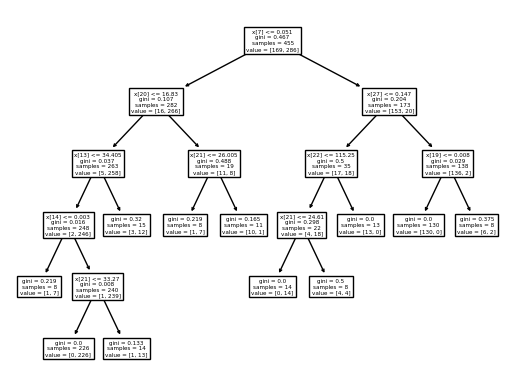

In [ ]:
# Decision Tree with Pruning
dt_pruned = DecisionTreeClassifier(min_samples_leaf=8, random_state=42)
dt_pruned.fit(X_train, y_train)
predictions_pruned = dt_pruned.predict(X_test)
accuracy_pruned = accuracy_score(y_test, predictions_pruned)
_ = tree.plot_tree(dt_pruned)
print(f"Accuracy {accuracy_pruned} with {count_if_then_clauses(dt_pruned)} if-else clauses")

#### (b) Use the algorithms developed in (a) on different datasets. Again, observe how your choices make a difference.

Ans: The default decision achieved an accuracy of 1 with 4 if-then clauses. By limiting the depth to 2, the resultant tree achieved an accuracy of 0.962 with 3 if-else clauses. By setting a minimum number of samples required to create a if-then clause to be 8, the resultant tree achieved an accuracy of 0.923 with 3 if-else clauses. These results are different from (a) such that the tree with most clauses performed the best.

In [ ]:
from sklearn.datasets import load_wine
import numpy as np

# Load the wine dataset
data = load_wine()
X, y = data.data, data.target

# Convert to a binary classification task (e.g., classes 0 vs 1, ignoring class 2)
is_class_0_or_1 = (y == 0) | (y == 1)
X_binary = X[is_class_0_or_1]
y_binary = y[is_class_0_or_1]

# Split the binary dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_binary, y_binary, test_size=0.2, random_state=42)

In [ ]:
X_binary.shape

(130, 13)

Accuracy 1.0 with 4 if-else clauses


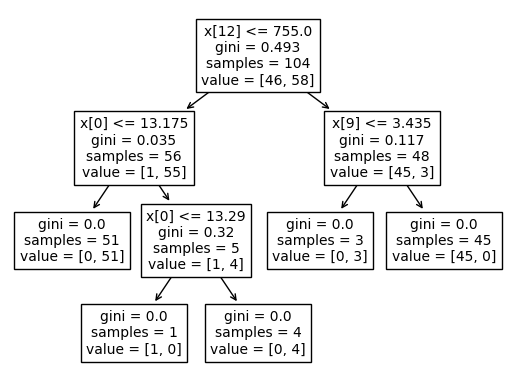

In [ ]:
# Basic Decision Tree Model
dt_basic = DecisionTreeClassifier(random_state=42)
dt_basic.fit(X_train, y_train)
predictions_basic = dt_basic.predict(X_test)
accuracy_basic = accuracy_score(y_test, predictions_basic)
_ = tree.plot_tree(dt_basic)
print(f"Accuracy {accuracy_basic} with {count_if_then_clauses(dt_basic)} if-else clauses")

Accuracy 0.9615384615384616 with 3 if-else clauses


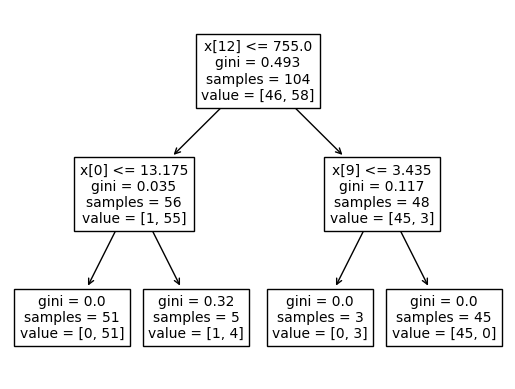

In [ ]:
# Decision Tree with Limited Depth
dt_limited_depth = DecisionTreeClassifier(max_depth=2, random_state=42)
dt_limited_depth.fit(X_train, y_train)
predictions_limited_depth = dt_limited_depth.predict(X_test)
accuracy_limited_depth = accuracy_score(y_test, predictions_limited_depth)
_ = tree.plot_tree(dt_limited_depth)
print(f"Accuracy {accuracy_limited_depth} with {count_if_then_clauses(dt_limited_depth)} if-else clauses")

Accuracy 0.9230769230769231 with 3 if-else clauses


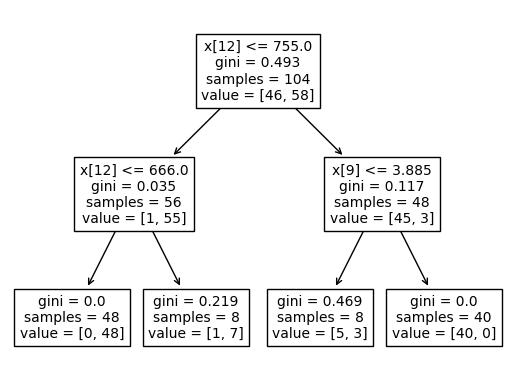

In [ ]:
# Decision Tree with Pruning
dt_pruned = DecisionTreeClassifier(min_samples_leaf=8, random_state=42)
dt_pruned.fit(X_train, y_train)
predictions_pruned = dt_pruned.predict(X_test)
accuracy_pruned = accuracy_score(y_test, predictions_pruned)
_ = tree.plot_tree(dt_pruned)
print(f"Accuracy {accuracy_pruned} with {count_if_then_clauses(dt_pruned)} if-else clauses")

#### (c) Finally, use the programs developed in (a) on a completely random dataset, generated artificially. Vary your strategies but also the number of input columns as well as the number of instances. How many if-then clauses do you need?

Ans:

In [ ]:
# Function to apply strategies and evaluate a decision tree model
def evaluate_decision_tree(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    strategies = {
        "Basic": DecisionTreeClassifier(random_state=42),
        "Limited Depth": DecisionTreeClassifier(max_depth=3, random_state=42),
        "Pruned": DecisionTreeClassifier(min_samples_leaf=4, random_state=42),
    }

    results = {}
    for name, model in strategies.items():
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        num_clauses = count_if_then_clauses(model)
        results[name] = {"Accuracy": accuracy, "Clauses": num_clauses}

    return results

# Evaluating on different dataset sizes
sizes = [
    (100, 5),  # Small dataset: 100 instances, 5 features
    (500, 10), # Medium dataset: 500 instances, 10 features
    (1000, 20) # Large dataset: 1000 instances, 20 features
]

evaluation_results = {}

for size, (instances, features) in enumerate(sizes, start=1):
    X, y = make_classification(n_samples=instances, n_features=features, n_classes=2, random_state=42)
    evaluation_results[f"Dataset {size} ({instances} instances, {features} features)"] = evaluate_decision_tree(X, y)

evaluation_results

{'Dataset 1 (100 instances, 5 features)': {'Basic': {'Accuracy': 0.85,
   'Clauses': 4},
  'Limited Depth': {'Accuracy': 0.85, 'Clauses': 4},
  'Pruned': {'Accuracy': 1.0, 'Clauses': 3}},
 'Dataset 2 (500 instances, 10 features)': {'Basic': {'Accuracy': 0.92,
   'Clauses': 24},
  'Limited Depth': {'Accuracy': 0.94, 'Clauses': 6},
  'Pruned': {'Accuracy': 0.94, 'Clauses': 20}},
 'Dataset 3 (1000 instances, 20 features)': {'Basic': {'Accuracy': 0.875,
   'Clauses': 55},
  'Limited Depth': {'Accuracy': 0.865, 'Clauses': 7},
  'Pruned': {'Accuracy': 0.845, 'Clauses': 41}}}

### 3. Compression:
* (a) Create a long random string using a Python program, and use a lossless compression algorithm of your choice to compress the string. Note the compression ratio.
* (b) What is the expected compression ratio in (a)? Explain why?

#### (a) Create a long random string using a Python program, and use a lossless compression algorithm of your choice to compress the string.

Ans: The long random string is compressed using zlib and the compression ratio is about 1.32:1.

In [ ]:
import zlib
import random
import string

# Generate a long random string
random_string = ''.join(random.choices(string.ascii_letters + string.digits, k=100000))

# Compress the string using zlib (a lossless compression algorithm)
compressed_data = zlib.compress(random_string.encode())

# Calculate the compression ratio
original_size = len(random_string.encode())
compressed_size = len(compressed_data)
compression_ratio = original_size / compressed_size

original_size, compressed_size, compression_ratio

(100000, 75205, 1.3296988232165414)

## Chapter 8: Capacity of Neural Networks

### 1. Maximum MEC of Neural Networks.
What is the maximum memory-equivalent capacity of the following neural networks. Assume binary classification, all weights are non-zero and all units have biases. There is enough information in the input that the first layer is not limited by it:
* (a) 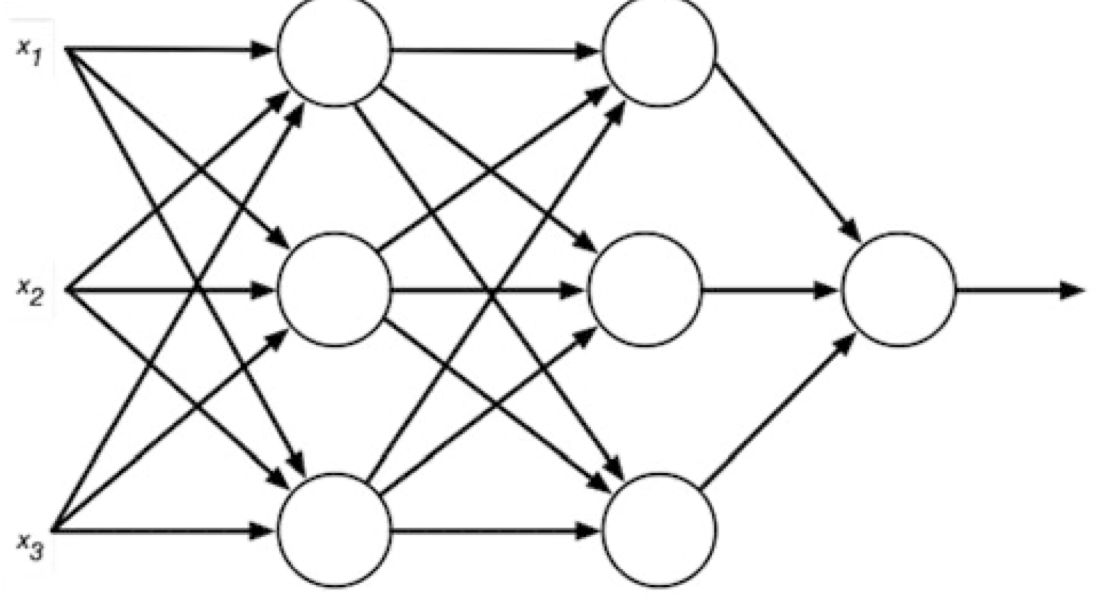
* (b) 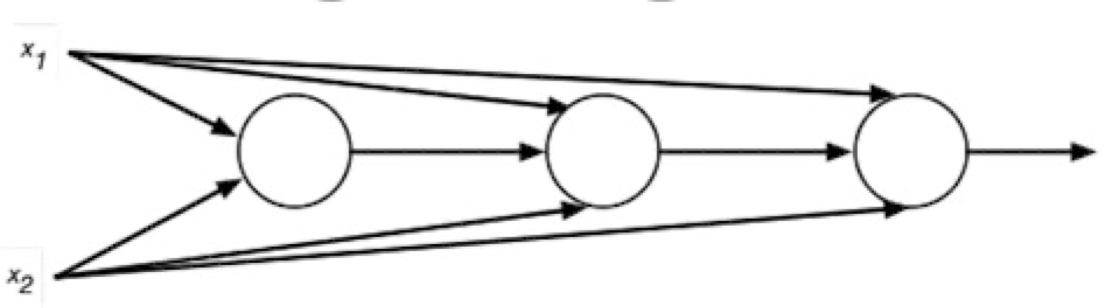

* (c) What is the maximum amount of rows that each network in (a) and (b) can memorize?

* (d) Answer (c) but for 4 classes instead of binary classification.

### 2. Draw two different neural network architectures that can guarantee to memorize the training data of a 12-instance binary classification problem of 4-dimensional inputs (assuming perfect training).

### 4. Upper Bounds:
* (a) Do Exercise 40.8 in MacKay’s book (MacKay 2003). It is cited here as follows:
    
    `Estimate in bits the total sensory experience that you have had in your life – visual information, auditory information, etc. Estimate how much information you have memorized. Estimate the information content of the works of Shakespeare.
    Compare these with the capacity of your brain assuming you have 1011 neurons each making 1000 synaptic connections and that the (information) capacity result for one neuron (two bits per connection) applies. Is your brain full yet?`

    Note that MacKay is right to suggest using information capacity for this estimate as image and acoustic data are relatively high dimensional and he also suggests 1000 connections per neuron.

* (b) Expand Algorithm 8 to work with more than one binary classification.
* (c) Expand Algorithm 8 to work with regression.

## Chapter 9: Neural Network Architectures

### 1. Implement a deep convolutional neural network from scratch using a popular deep learning framework (e.g., TensorFlow or PyTorch).
Train and evaluate the network on a standard image classification dataset, such as CIFAR-10 or MNIST. First, experiment blindly with various hyperparameters and architectures and observe the model’s performance. Second, apply the measurements proposed in this book to reduce the hyperparameter search space and observe the model’s performance.